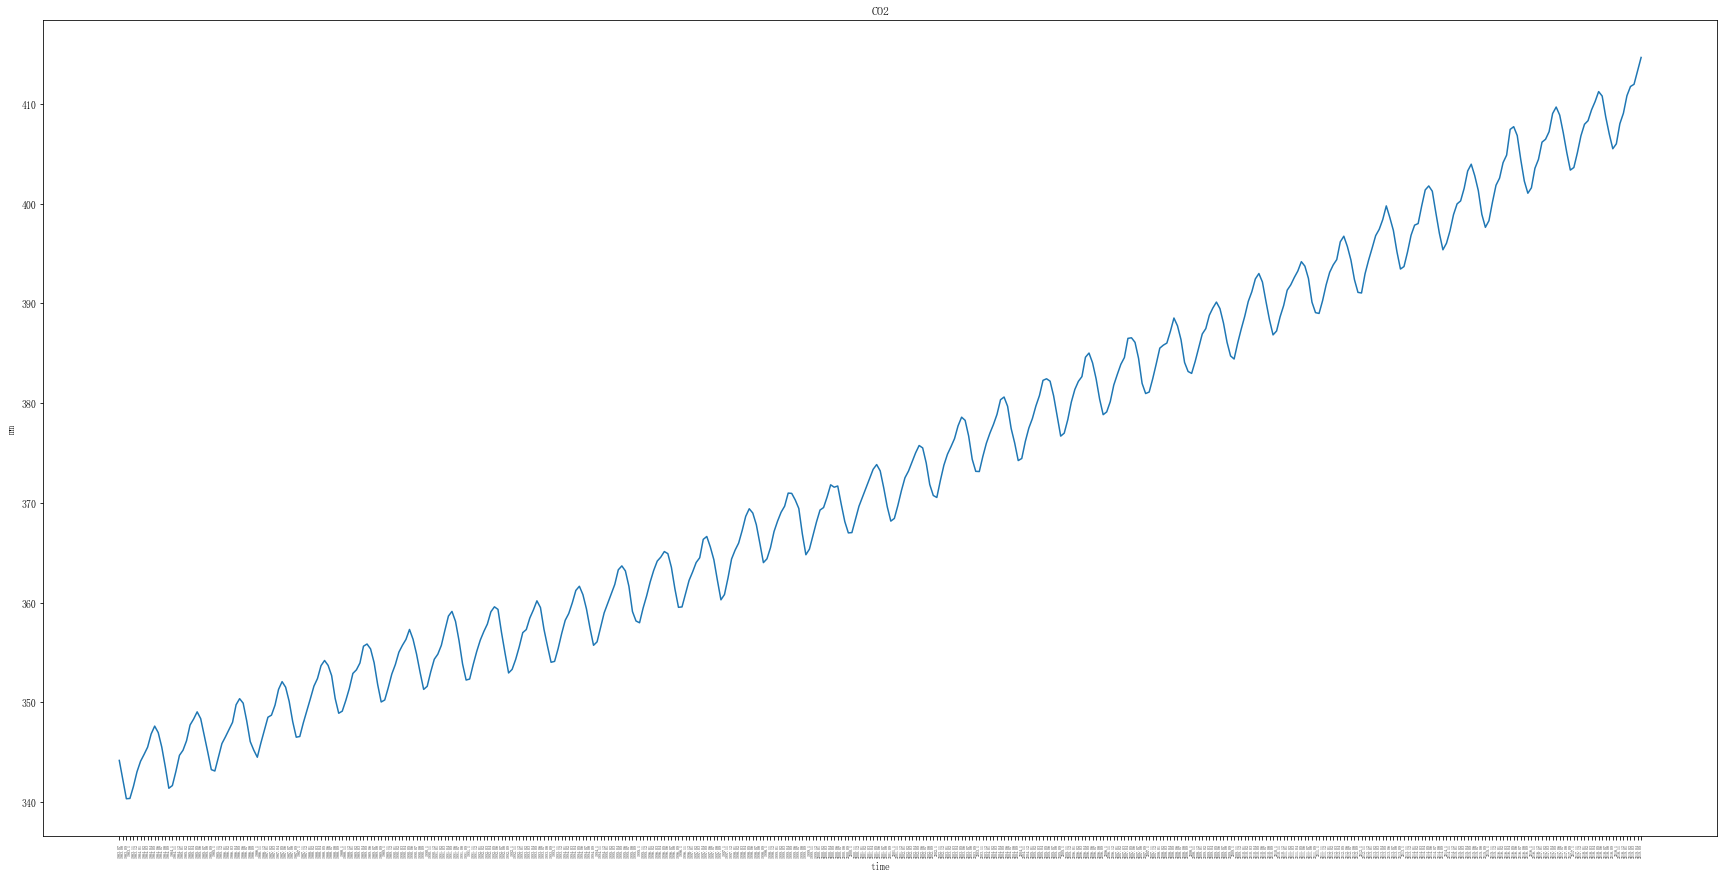

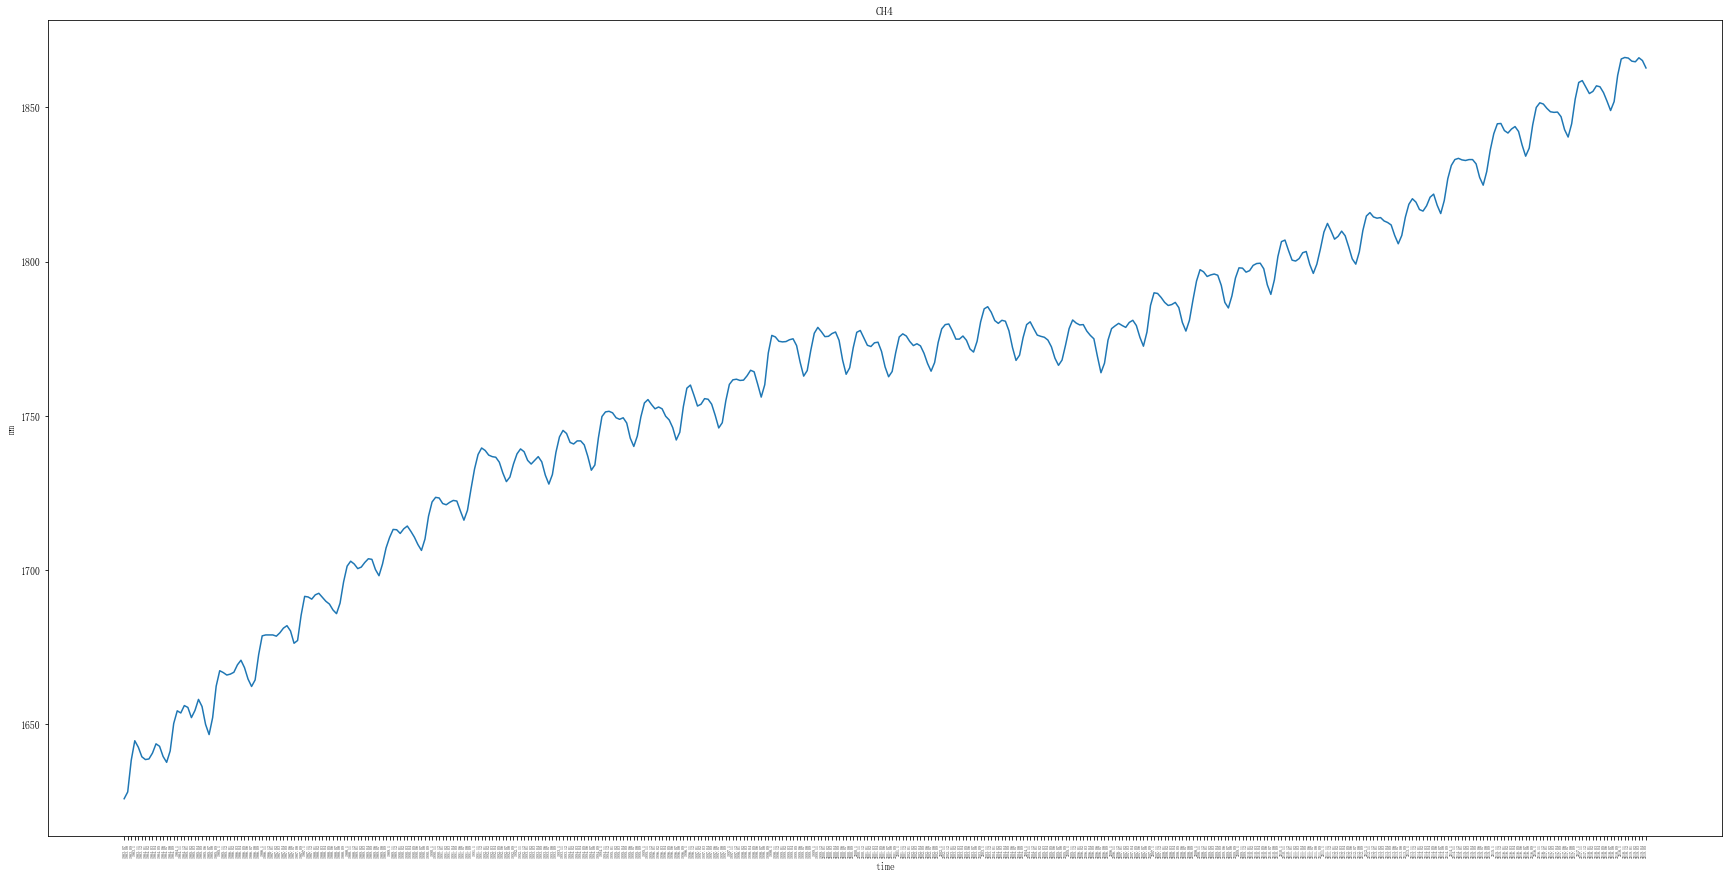

In [91]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# load dataset
dataset = read_csv('data.csv', header=0)
# print(dataset.values[:,0])

# month=dataset.values[:,0]
month=list(map(str,dataset.values[:,0]))
# print(month)
# print(type(month[0]))
values = dataset.values

# specify columns to plot
groups = [1, 2]
i = 1
# plot each column

start = datetime.datetime(1983, 7, 1)
end = datetime.datetime(2019, 5, 1)
# 设置日期的间隔为1
delta = datetime.timedelta(days=30.4)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
# print(dates)

for group in groups:
    
    fig= pyplot.figure(figsize = (30,15))
#     pyplot.subplot(len(groups)*2, 1, i)
    pyplot.plot(month,values[:, group])
    pyplot.title(dataset.columns[group], loc='center')
    
    pyplot.xlabel("time")
    pyplot.ylabel("mm")
    pyplot.xticks(rotation=90,fontsize=4)
    # 第一个参数是值，第二个参数是对应的显示效果(若无传入则默认直接显示原始数据)，第三个参数是标签旋转角度


    # 获取当前的坐标
#     ax = pyplot.gca()
#     for label in ax.get_xticklabels():
#         label.set_visible(False)
#     for label in ax.get_xticklabels()[::20]:
#         label.set_visible(True)

    # 设置日期的显示格式
#     date_format = mpl.dates.DateFormatter("%Y-%m-%d")
#     ax.xaxis.set_major_formatter(date_format)

    #日期的排列根据图像的大小自适应
#     fig.autofmt_xdate()
    #     i += 2
    pyplot.savefig("{}量".format(dataset.columns[group]),dpi=240)
    pyplot.show()

In [181]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# 转换序列成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in=1, n_out=1,y_columns=[0],dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[y_columns].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in y_columns]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 加载数据集
dataset = read_csv('data.csv', header=0)
values = dataset.values[:,[1,2]]
# print(values)
# # 整数编码
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# scaled=values

# 构建监督学习问题
reframed = series_to_supervised(scaled, 1, 1,y_columns=[0,1])
print(reframed.head(5))
# 分割为训练集和测试集
values = reframed.values

n_train_hours = 300
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分为输入输出
train_X, train_y = train[:, 0:-2], train[:, -2:]

test_X, test_y = test[:, 0:-2], test[:, -2:]
# 重塑成3D形状 [样例, 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.051675   0.000000  0.025838  0.009155
2   0.025838   0.009155  0.000000  0.052018
3   0.000000   0.052018  0.000404  0.078236
4   0.000404   0.078236  0.016687  0.069496
5   0.016687   0.069496  0.036334  0.056596
(300, 1, 2) (300, 2) (130, 1, 2) (130, 2)


Train on 300 samples, validate on 130 samples
Epoch 1/100
 - 3s - loss: 0.3715 - val_loss: 0.7533
Epoch 2/100
 - 0s - loss: 0.3324 - val_loss: 0.6974
Epoch 3/100
 - 0s - loss: 0.2930 - val_loss: 0.6394
Epoch 4/100
 - 0s - loss: 0.2540 - val_loss: 0.5788
Epoch 5/100
 - 0s - loss: 0.2161 - val_loss: 0.5157
Epoch 6/100
 - 0s - loss: 0.1802 - val_loss: 0.4501
Epoch 7/100
 - 0s - loss: 0.1476 - val_loss: 0.3833
Epoch 8/100
 - 0s - loss: 0.1197 - val_loss: 0.3170
Epoch 9/100
 - 0s - loss: 0.0975 - val_loss: 0.2535
Epoch 10/100
 - 0s - loss: 0.0827 - val_loss: 0.1979
Epoch 11/100
 - 0s - loss: 0.0882 - val_loss: 0.1701
Epoch 12/100
 - 0s - loss: 0.0901 - val_loss: 0.1613
Epoch 13/100
 - 0s - loss: 0.0886 - val_loss: 0.1640
Epoch 14/100
 - 0s - loss: 0.0887 - val_loss: 0.1601
Epoch 15/100
 - 0s - loss: 0.0866 - val_loss: 0.1509
Epoch 16/100
 - 0s - loss: 0.0843 - val_loss: 0.1435
Epoch 17/100
 - 0s - loss: 0.0831 - val_loss: 0.1432
Epoch 18/100
 - 0s - loss: 0.0810 - val_loss: 0.1462
Epoch 19/

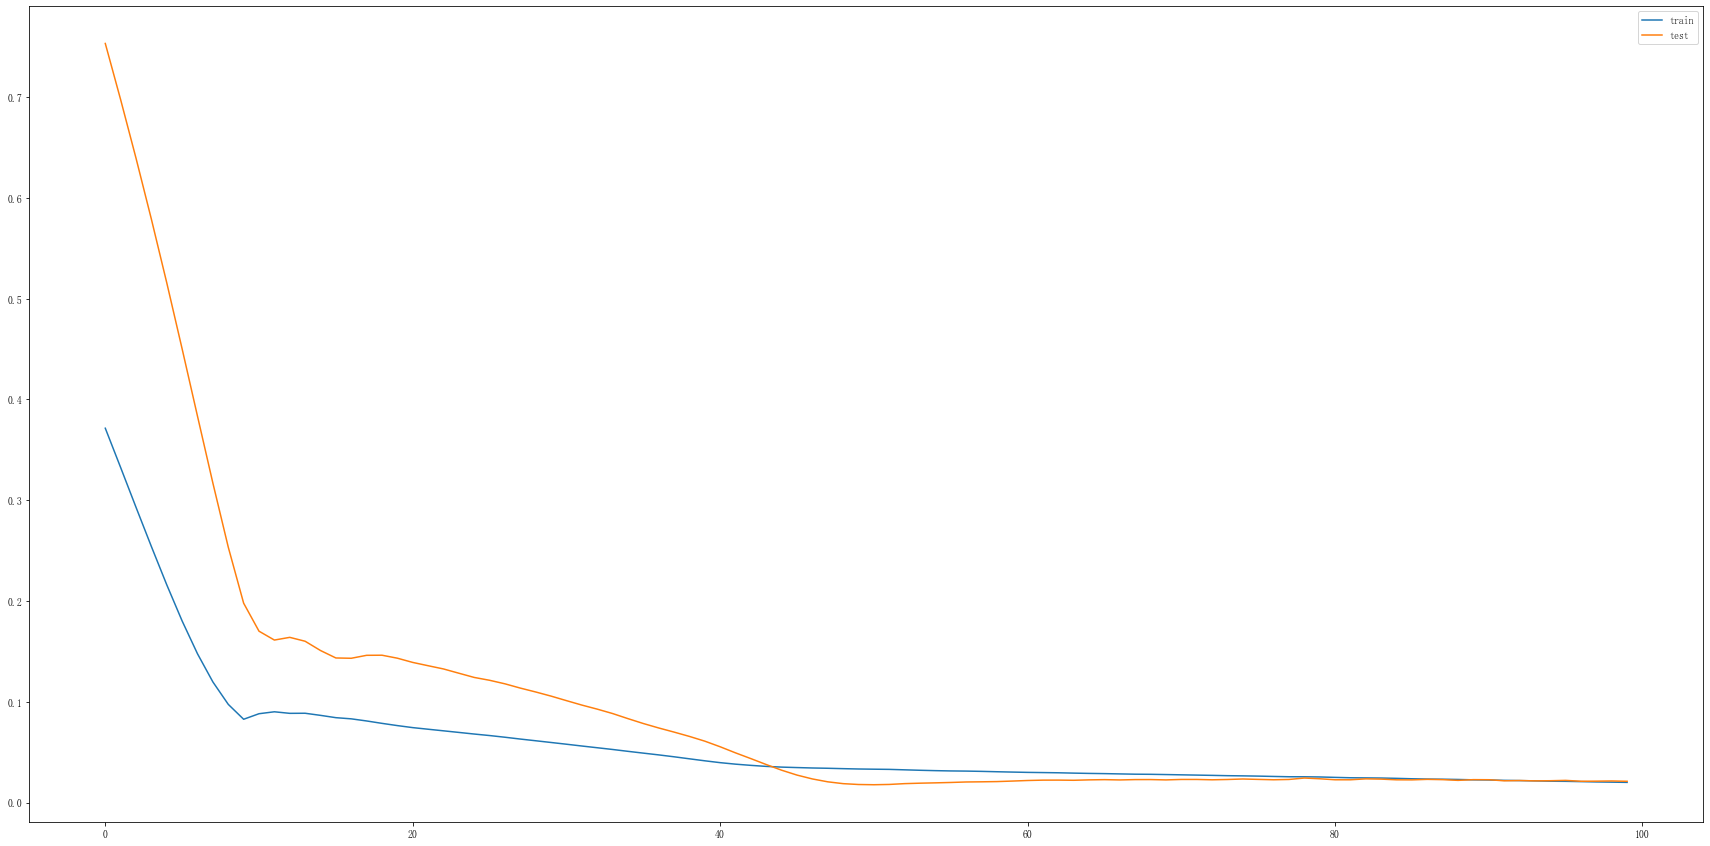

In [197]:
# 设计网络
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(10))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')
# 拟合神经网络模型
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# 绘制训练测试误差图
fig= pyplot.figure(figsize = (30,15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('训练误差图.png')
pyplot.show()


In [198]:
# 做出预测
yhat = model.predict(test_X)

test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# 反向转换预测值比例
# inv_yhat = concatenate((yhat, test_X1[:, 1:]), axis=1)

inv_yhat = concatenate((yhat, test_X1[:, 2:]), axis=1)

inv_yhat = scaler.inverse_transform(inv_yhat)
print(inv_yhat.shape)
# inv_yhat = inv_yhat[:,0]
# 反向转换实际值比例
test_y1 = test_y.reshape((len(test_y), 2))
inv_y = concatenate((test_y1, test_X1[:, 2:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]


(130, 2)


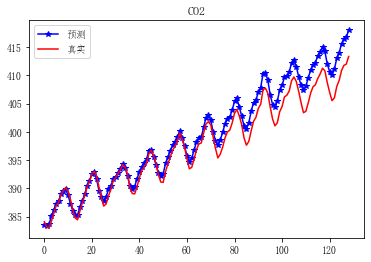

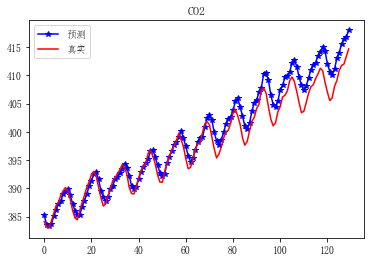

In [199]:
# 绘制历史数据和预测数据图
plt.plot(inv_yhat[1:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:-1,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


plt.plot(inv_yhat[:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


Test RMSE: 2.260


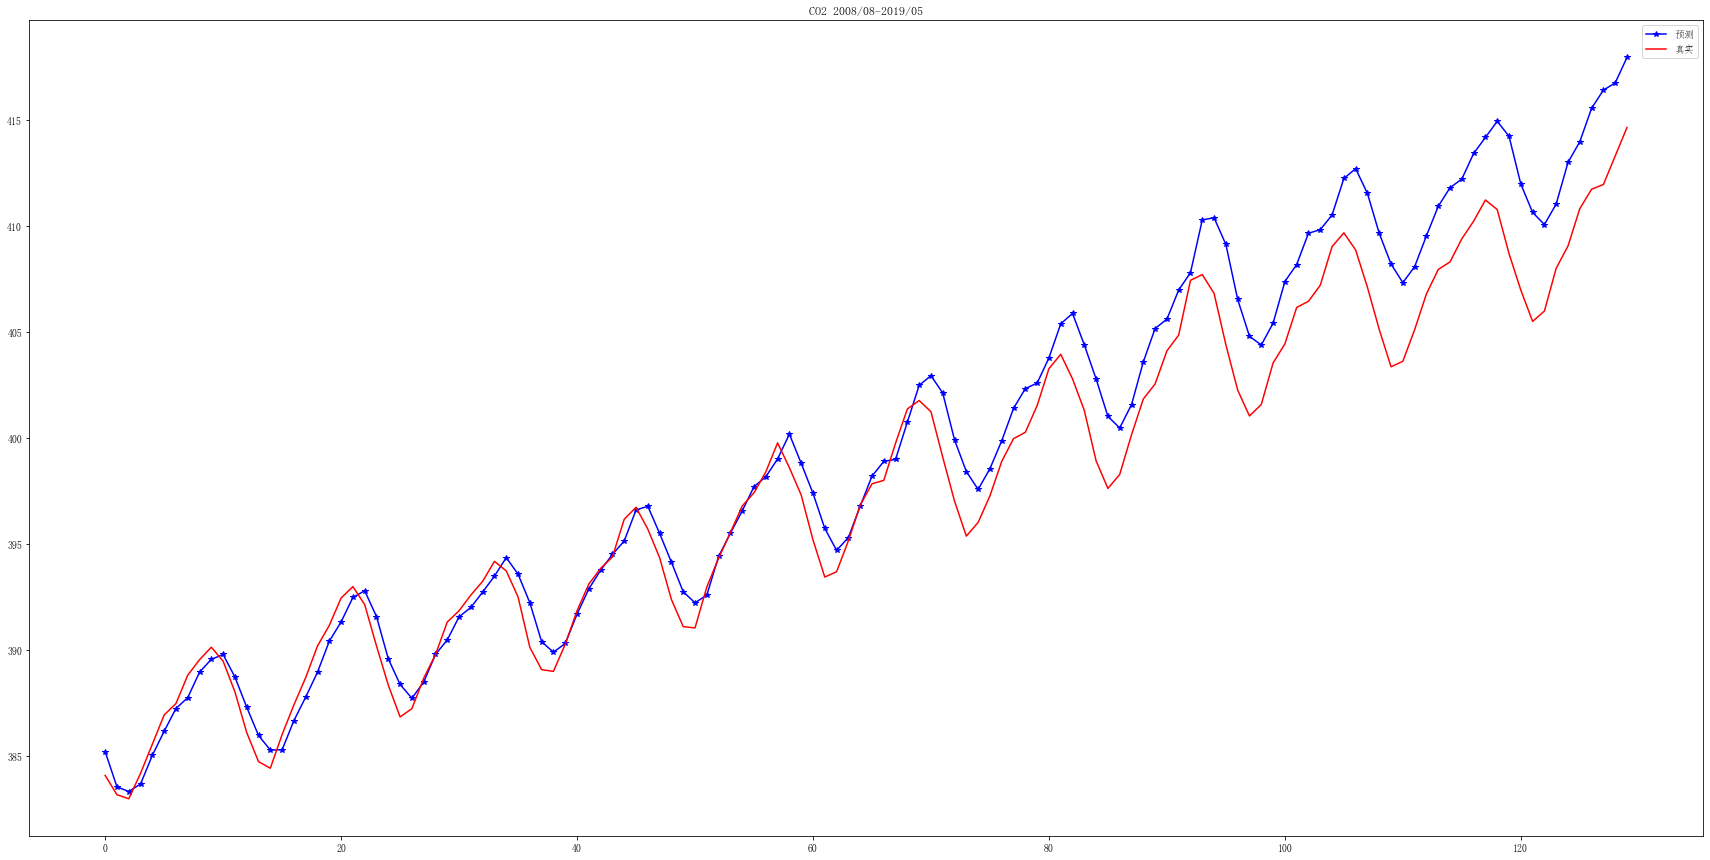

Test RMSE: 5.300


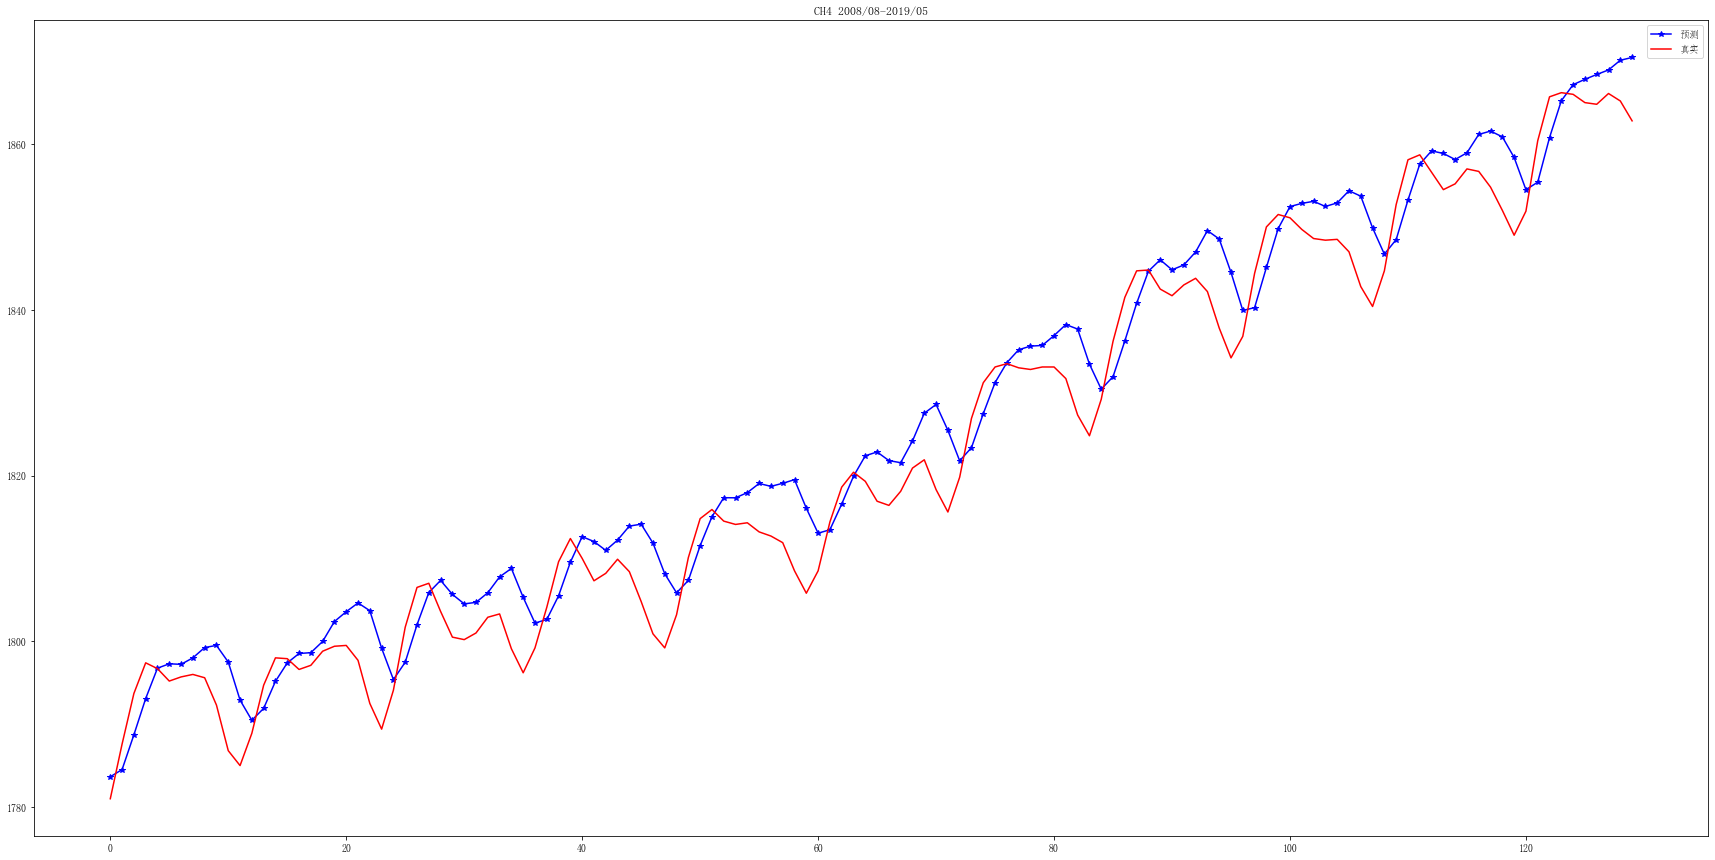

In [200]:
# 绘制历史数据和预测数据图
rmse = sqrt(mean_squared_error(inv_yhat[:,0], inv_y[:,0]))
print('Test RMSE: %.3f' % rmse)

fig= pyplot.figure(figsize = (30,15))
plt.plot(inv_yhat[:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:,0],label="真实",c='r')
plt.legend()
plt.title('CO2 2008/08-2019/05')
plt.savefig('CO2预测模型检验.png')
plt.show()
# 计算RMSE



rmse = sqrt(mean_squared_error(inv_yhat[:,1], inv_y[:,1]))
print('Test RMSE: %.3f' % rmse)

fig= pyplot.figure(figsize = (30,15))
plt.plot(inv_yhat[:,1],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:,1],label="真实",c='r')
plt.legend()
plt.title('CH4 2008/08-2019/05')
plt.savefig('CH4预测测试模型检验.png')
plt.show()

(1, 2)


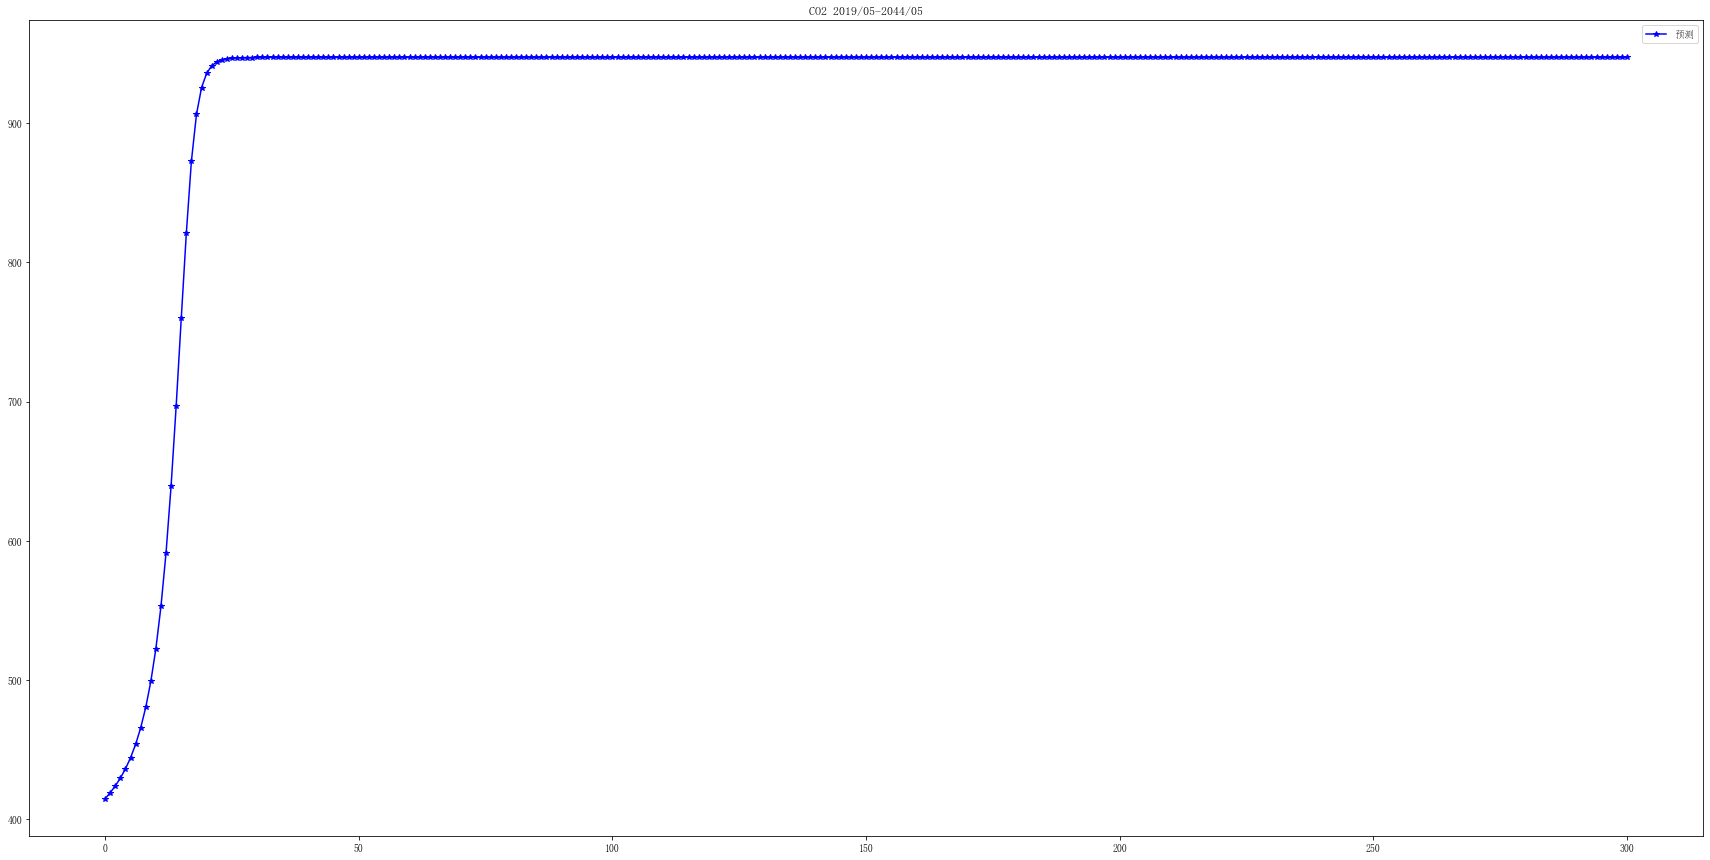

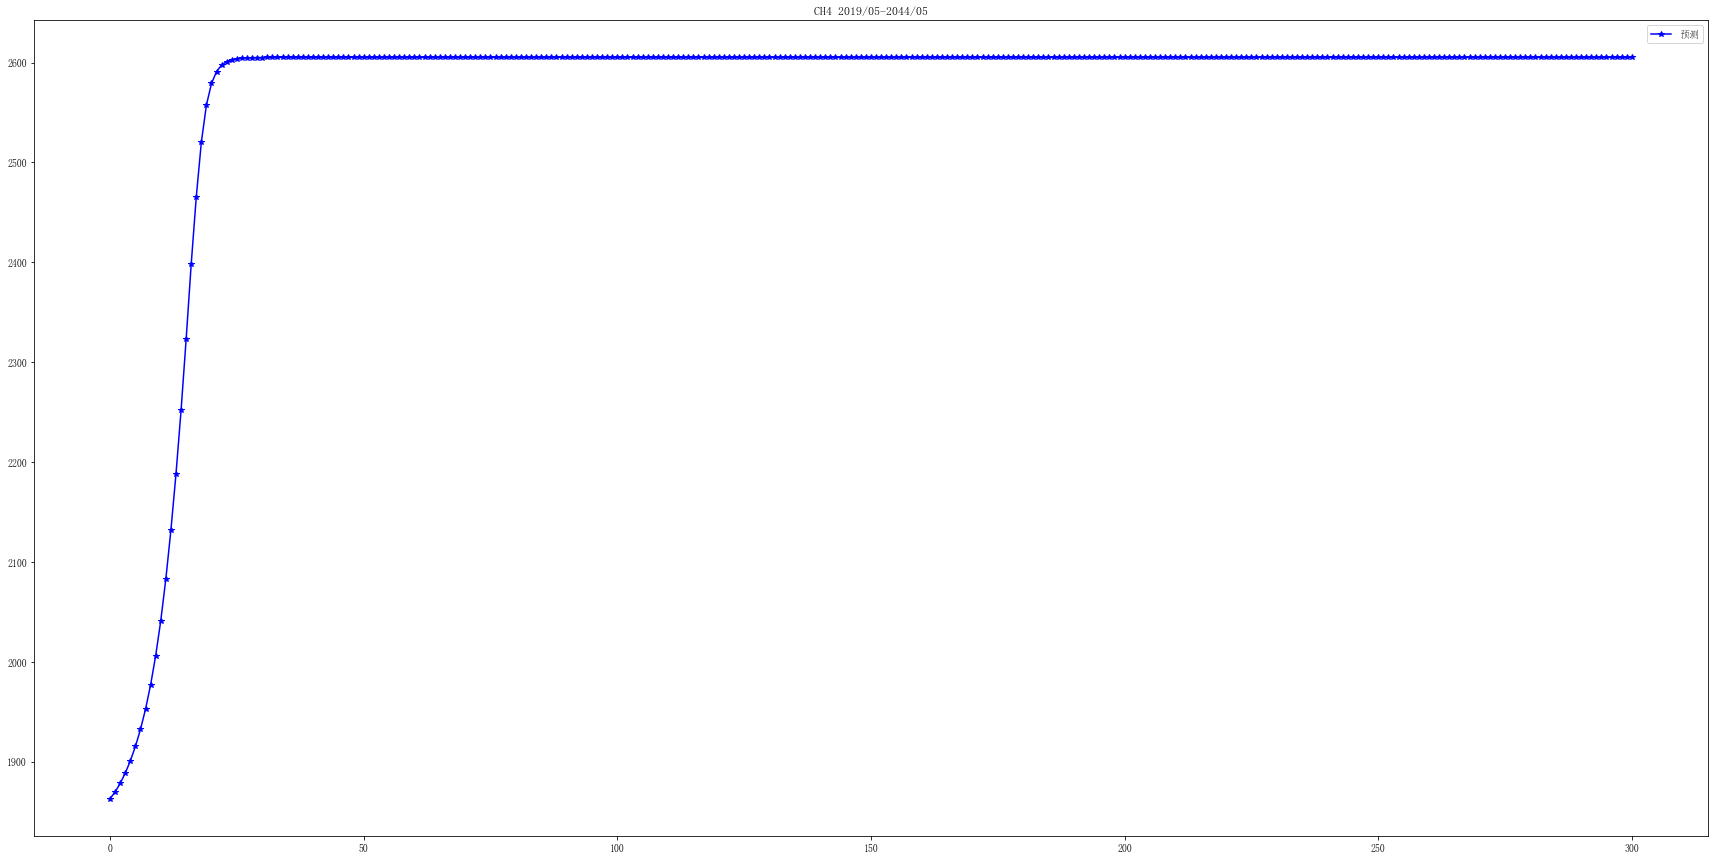

In [201]:
#预测未来25年
alltime=12*25
pred_y=test_y1[-1,:]
pred_y=pred_y.reshape(1,1,(pred_y.shape[0]))
print(pred_y[-1,:].shape)
for i in range(alltime):
    tmp=pred_y[-1,:,:]
#     print(tmp.shape)
    tmp=tmp.reshape(1,1,(tmp.shape[-1]))
#     print(tmp.shape)
    pre=model.predict(tmp)
    pre=pre.reshape(1,1,(pre.shape[-1]))
    pred_y=np.vstack((pred_y,pre))
#     print(pred_y.shape)
# print(pred_y)
pred_y=pred_y.reshape((pred_y.shape[0], pred_y.shape[2]))

inv_pred_y = scaler.inverse_transform(pred_y)

# 绘制历史数据和预测数据图
fig= pyplot.figure(figsize = (30,15))
plt.plot(inv_pred_y[:,0],label='预测',c='b',linestyle='-', marker='*')
plt.legend()
plt.title('CO2 2019/05-2044/05')
plt.savefig('CO2未来25年预测.png')
plt.show()
# 计算RMSE

fig= pyplot.figure(figsize = (30,15))
plt.plot(inv_pred_y[:,1],label='预测',c='b',linestyle='-', marker='*')
plt.legend()
plt.title('CH4 2019/05-2044/05')
plt.savefig('CH4未来25年预测.png')
plt.show()